In [3]:
!pip install rdkit
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import DataStructs
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 14.0 MB/s eta 0:00:00a 0:00:01


In [19]:
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import DataStructs
import numpy as np

In [4]:
df = pd.read_csv('/Users/ekaterinakostina/Downloads/data_practice.csv')

In [11]:
fingers = df['smiles']
print(fingers.head())

0        N#CC12CC1CO2
1       COCC(O)C#CC=O
2    COC1C2CC(=NO)C12
3       CC(CC=O)OCC#C
4     COC(=N)N1CCC1=N
Name: smiles, dtype: object


In [95]:
from rdkit.Chem import RDKFingerprint
import numpy as np
fingerprints = []

# Цикл для обработки каждого SMILES
for smiles in fingers:
    mol = Chem.MolFromSmiles(smiles)
    fingerprint_rdk = RDKFingerprint(mol)
    fingerprint_rdk_np = np.array(fingerprint_rdk)
    fingerprints.append(ingerprint_rdk_np)
    


In [74]:
fingerprints

[array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 1, ..., 0, 0, 0]),
 array([0,

In [96]:
df1 = pd.DataFrame(fingerprints)

# Выведем часть таблицы
print(df1.head())

   0     1     2     3     4     5     6     7     8     9     ...  2038  \
0     0     0     1     0     0     1     0     0     0     0  ...     0   
1     0     0     1     0     0     1     0     0     0     0  ...     0   
2     0     0     1     0     0     1     0     0     0     0  ...     0   
3     0     0     1     0     0     1     0     0     0     0  ...     0   
4     0     0     1     0     0     1     0     0     0     0  ...     0   

   2039  2040  2041  2042  2043  2044  2045  2046  2047  
0     0     1     0     0     0     0     0     0     0  
1     0     1     0     0     0     0     0     0     0  
2     0     1     0     0     0     0     0     0     0  
3     0     1     0     0     0     0     0     0     0  
4     0     1     0     0     0     0     0     0     0  

[5 rows x 2048 columns]


In [81]:
!pip install umap-learn
import umap

In [98]:
#Применить нелинейный метод снижения размерности
X_umap =  umap.UMAP(n_neighbors=200,min_dist=0.7).fit_transform(df1)


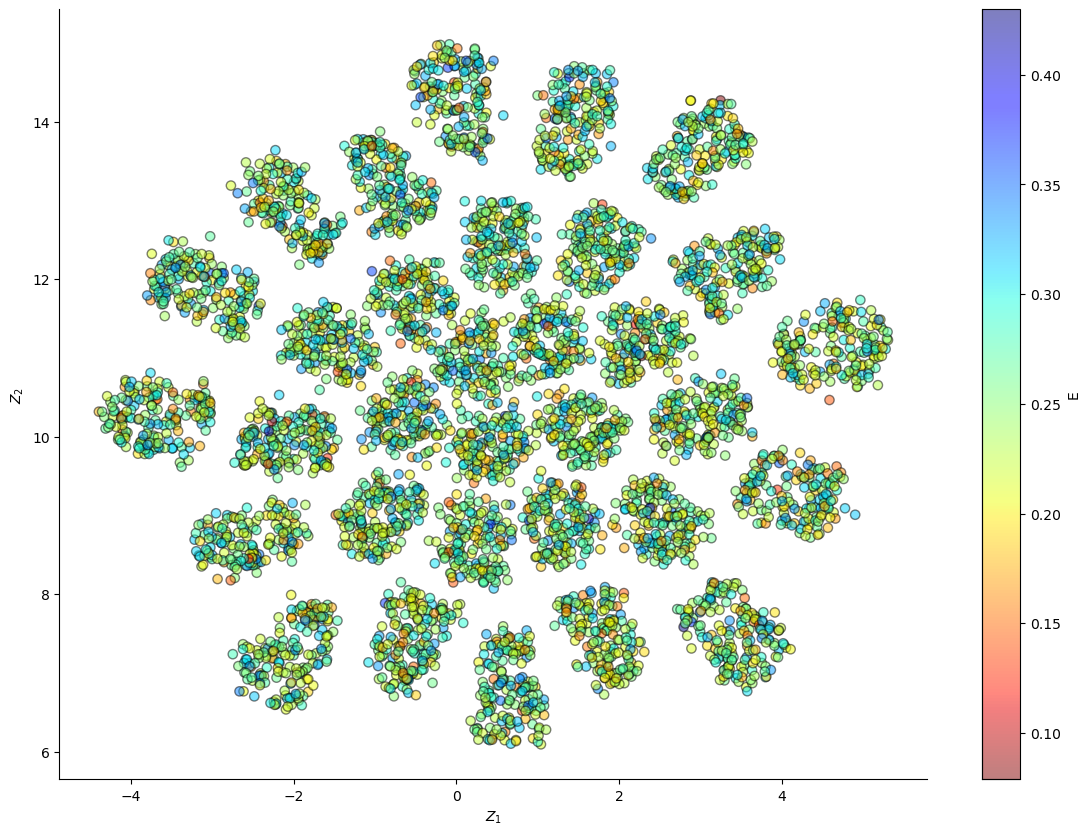

In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
Y = df['gap']
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_umap[:,0], X_umap[:,1], c=Y, s=45, edgecolors='black', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

In [105]:
#Выполнить кластеризацию данных, используя минимум 2 различных метода
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator

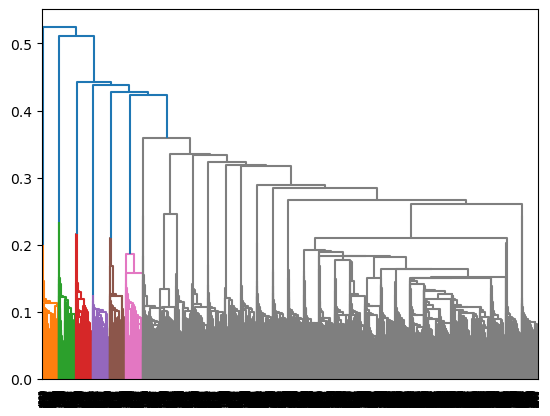

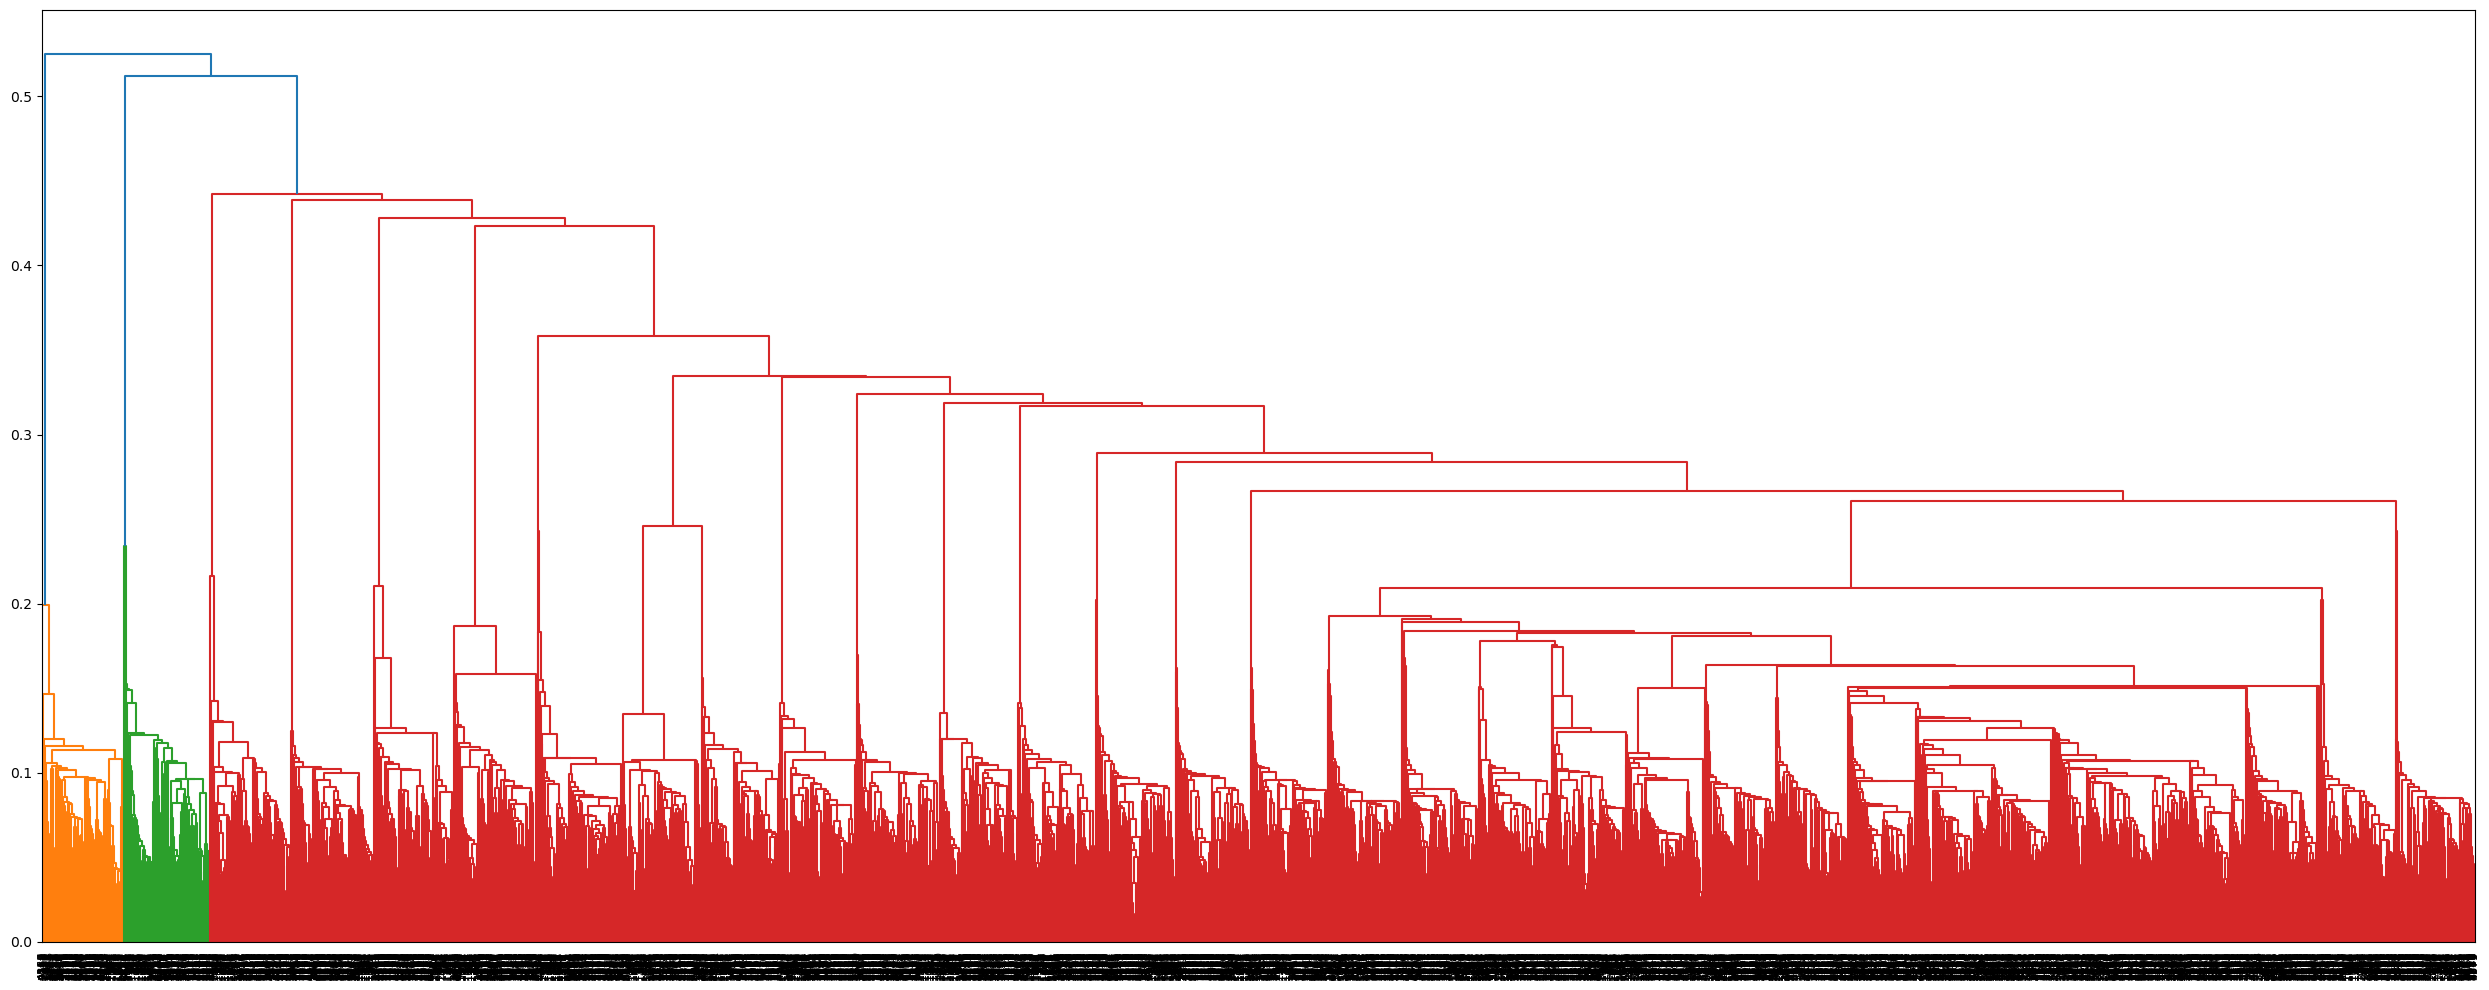

In [123]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X_umap, 'single')
hierarchy.dendrogram(
    Z,
)


plt.figure(figsize=(25, 10))
hierarchy.dendrogram(
    Z,
    leaf_rotation=90,       # поворот подписей
    leaf_font_size=8,       # размер шрифта
    color_threshold=0.5     # управляет цветами кластеров
)
plt.tight_layout()
plt.show()


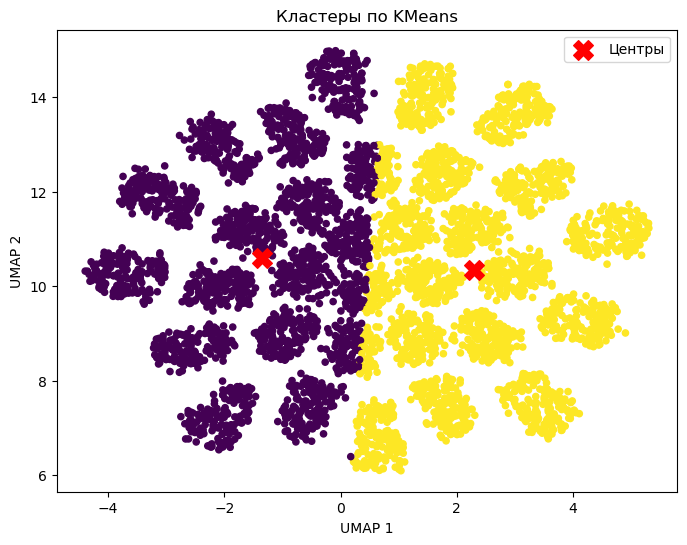

Silhouette Score: 0.335


In [265]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=2, random_state=15)
model.fit(X_umap)

# кластеры
pred = model.predict(X_umap)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=pred, cmap='viridis', s=20)  # заменили labels → pred
plt.title("Кластеры по KMeans")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# Центры кластеров
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Центры')

plt.legend()
plt.show()


score = silhouette_score(X_umap, pred)
print(f"Silhouette Score: {score:.3f}")

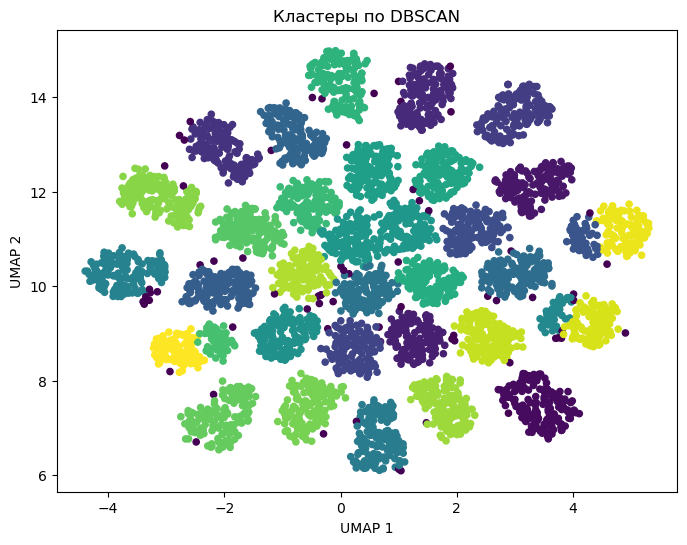

Silhouette Score: 0.496


In [231]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Шаг 1: создаём и обучаем модель
db = DBSCAN(eps=0.2, min_samples=14)  # eps — радиус; min_samples — минимум соседей
pred = db.fit_predict(X_umap)

# Шаг 2: визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=pred, cmap='viridis', s=20)
plt.title("Кластеры по DBSCAN")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

score = silhouette_score(X_umap, pred)
print(f"Silhouette Score: {score:.3f}")